# Machine Learning (SVM & Random Forest)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_validate
import seaborn as sn
import matplotlib.pyplot as plt
import graphviz


#### Import dataset

In [2]:
ngs_reads = pd.read_json('exported_datasets/all_full_features.json')

In [3]:
ngs_reads.reset_index(drop=True, inplace=True)

In [4]:
ngs_reads.columns

Index(['organism', 'technology', 'read_number', 'evaluation',
       'module_6_n_content', 'total_sequences', 'percent_gc',
       'min_sequence_length', 'max_sequence_length', 'module_1_status',
       'module_2_status', 'module_3_status', 'module_4_status',
       'module_5_status', 'module_6_status', 'module_7_status',
       'module_8_status', 'module_9_status', 'module_10_status', 'module_1_a0',
       'module_1_a1', 'module_1_a2', 'module_1_a3', 'module_2_std_neg',
       'module_2_std_pos', 'module_3_alpha', 'module_3_beta',
       'module_4_diff_mean', 'module_4_diff_std', 'module_7_alpha',
       'module_7_beta', 'module_8_alpha', 'module_8_beta'],
      dtype='object')

In [5]:
ngs_reads.columns

Index(['organism', 'technology', 'read_number', 'evaluation',
       'module_6_n_content', 'total_sequences', 'percent_gc',
       'min_sequence_length', 'max_sequence_length', 'module_1_status',
       'module_2_status', 'module_3_status', 'module_4_status',
       'module_5_status', 'module_6_status', 'module_7_status',
       'module_8_status', 'module_9_status', 'module_10_status', 'module_1_a0',
       'module_1_a1', 'module_1_a2', 'module_1_a3', 'module_2_std_neg',
       'module_2_std_pos', 'module_3_alpha', 'module_3_beta',
       'module_4_diff_mean', 'module_4_diff_std', 'module_7_alpha',
       'module_7_beta', 'module_8_alpha', 'module_8_beta'],
      dtype='object')

#### extract target variable

In [6]:
target = ngs_reads.evaluation.values
ngs_reads.drop(columns='evaluation', inplace=True)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

#### remove unused columns from dataset

In [7]:
ngs_reads.drop(columns=['organism', 'technology', 'read_number'], inplace=True)
ngs_reads

,module_6_n_content,total_sequences,percent_gc,min_sequence_length,max_sequence_length,module_1_status,module_2_status,module_3_status,module_4_status,module_5_status,...,module_2_std_neg,module_2_std_pos,module_3_alpha,module_3_beta,module_4_diff_mean,module_4_diff_std,module_7_alpha,module_7_beta,module_8_alpha,module_8_beta
0,0.000191,511669,34,35,301,0,2,2,0,2,...,0.152436,0.110886,166.495429,5.099693,0.024625,0.068540,170.582444,1.033088,0.126128,6.786162
1,0.000584,220494,34,35,301,2,1,2,0,2,...,0.638471,0.489727,165.938485,5.605282,0.023490,0.066026,170.611964,1.011972,0.206852,11.074234
2,0.000187,6015314,65,35,301,0,1,2,0,1,...,0.588583,0.274379,33.631888,2.069546,0.031007,0.068681,170.583420,1.003109,0.049906,1.944473
3,0.000017,1916272,35,35,301,2,2,2,0,2,...,0.191566,0.094444,166.506391,5.109851,0.025570,0.066240,170.540443,1.021960,-0.807414,0.005944
4,0.000000,334,35,69,301,0,0,2,0,0,...,4.911008,1.864702,0.108615,-0.116077,0.114478,0.071359,170.611536,1.012826,9.004749,162.619610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.000094,1367226,38,35,251,2,2,2,0,2,...,0.051924,0.072236,166.420364,4.940322,0.028492,0.066430,170.461306,1.161733,0.035012,3.259176
180,0.001998,1836688,39,35,251,2,2,2,0,2,...,0.088583,0.075866,166.432328,5.183535,0.025113,0.067765,170.397161,1.134837,0.040512,2.163178
181,0.000084,799870,37,35,251,2,2,2,0,2,...,0.067566,0.062786,166.649269,4.959551,0.029550,0.067901,170.407269,1.203378,-1.156613,0.001990
182,0.002184,1369977,39,35,251,2,2,2,0,2,...,0.075292,0.070757,166.049585,5.179259,0.025674,0.067058,170.497554,1.105446,0.044248,2.964755


#### train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(ngs_reads, target, test_size=0.3, random_state=109)

#### Confusion Matrix Heatmap Training Set

<AxesSubplot:>

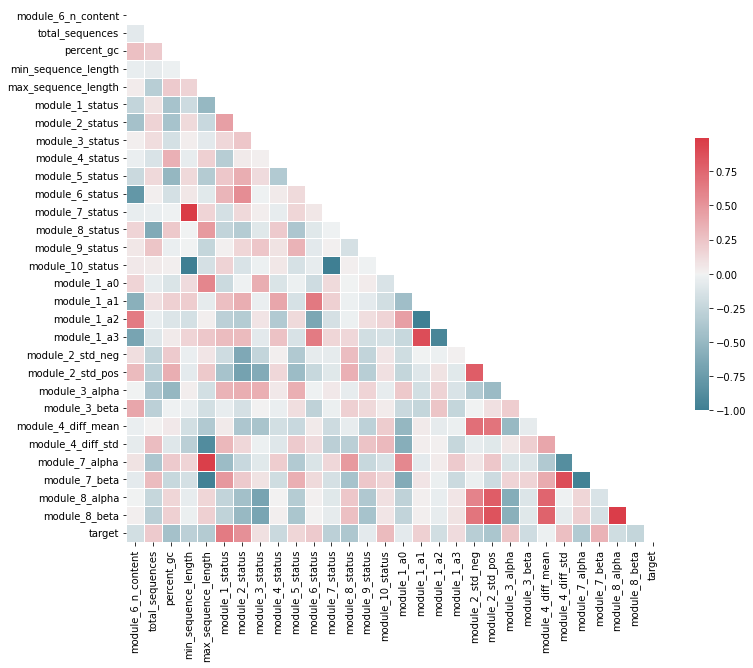

In [9]:
train = X_train.copy()
train.loc[:, 'target'] = y_train.tolist()
train

corr_matrix = train.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

#### Support Vector Machine Training

In [10]:
clf_svc = svm.SVC(kernel='linear')

In [11]:
clf_svc.fit(X_train, y_train)

SVC(kernel='linear')

##### SVM performance

In [12]:
y_pred=clf_svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.6071428571428571
Precision:  0.8125
Recall:  0.6190476190476191
F1 Score:  0.7027027027027026


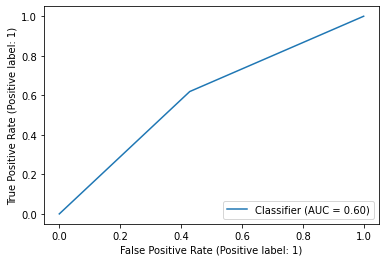

In [13]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### SVM with Cross Validation

In [14]:
clf_svm_cv = svm.SVC(kernel='linear')
scores = cross_validate(clf_svm_cv, ngs_reads, target, cv=5, 
                        scoring=('accuracy', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [0.7027027  0.7027027  0.59459459 0.43243243 0.61111111]
F1 Scores:  [0.8        0.8        0.74576271 0.53333333 0.75862069]
Accuracy: 0.61 +/- 0.10
F1 Score: 0.73 +/- 0.10


#### Decision Tree

In [15]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [16]:
y_pred = clf_dt.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9107142857142857
Precision:  1.0
Recall:  0.8809523809523809
F1 Score:  0.9367088607594937


[Text(0.39705882352941174, 0.9166666666666666, 'module_2_std_neg <= 0.113\ngini = 0.498\nsamples = 128\nvalue = [60, 68]\nclass = good'),
 Text(0.11764705882352941, 0.75, 'module_1_a1 <= -0.061\ngini = 0.131\nsamples = 57\nvalue = [4, 53]\nclass = good'),
 Text(0.058823529411764705, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = ugly'),
 Text(0.17647058823529413, 0.5833333333333334, 'module_7_status <= 1.5\ngini = 0.07\nsamples = 55\nvalue = [2, 53]\nclass = good'),
 Text(0.11764705882352941, 0.4166666666666667, 'gini = 0.0\nsamples = 53\nvalue = [0, 53]\nclass = good'),
 Text(0.23529411764705882, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = ugly'),
 Text(0.6764705882352942, 0.75, 'module_2_std_neg <= 0.164\ngini = 0.333\nsamples = 71\nvalue = [56, 15]\nclass = ugly'),
 Text(0.47058823529411764, 0.5833333333333334, 'module_5_status <= 1.5\ngini = 0.499\nsamples = 27\nvalue = [14, 13]\nclass = ugly'),
 Text(0.35294117647058826, 0.416666666

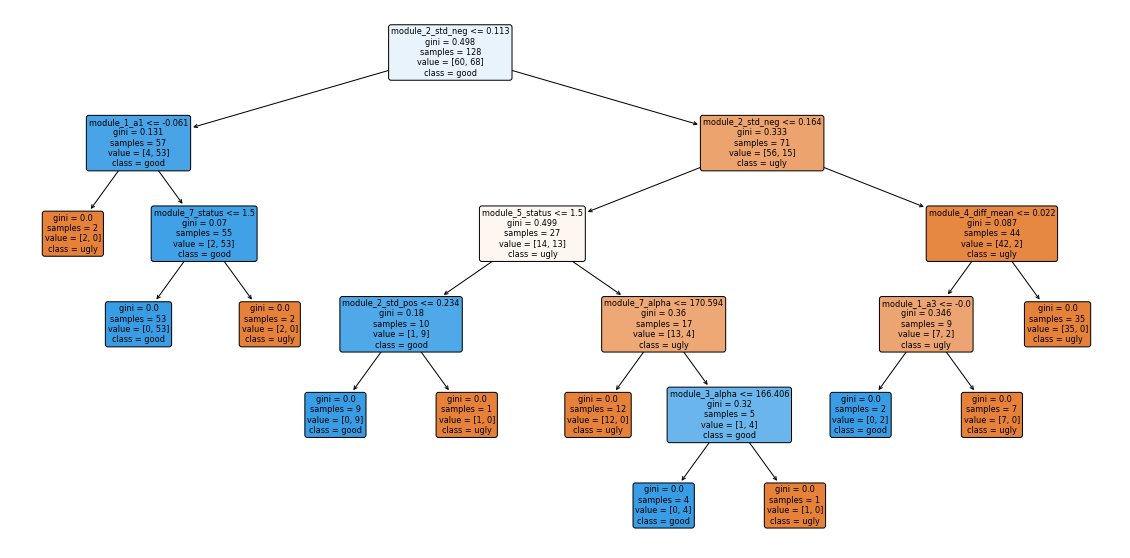

In [17]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_dt, 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Random Forest Training

In [18]:
clf_rf=RandomForestClassifier(n_estimators=100, verbose=True)

In [19]:
clf_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(verbose=True)

##### Random Forest performance

In [20]:
y_pred = clf_rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9821428571428571
Precision:  1.0
Recall:  0.9761904761904762
F1 Score:  0.9879518072289156


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


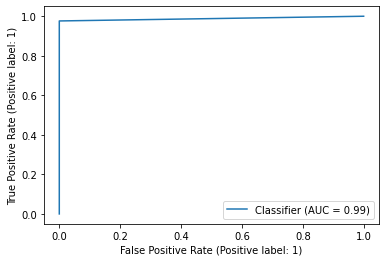

In [21]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### Feature Importance Random Forest

Text(0.5, 0, 'Relative Importance')

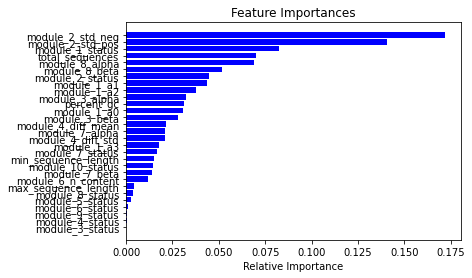

In [22]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.xlabel('Relative Importance')

#### Random Forest with Cross Validation

In [23]:
clf_rf_cv = RandomForestClassifier(n_estimators=100)
scores = cross_validate(clf_rf_cv, ngs_reads, target, cv=5, 
                        scoring=('accuracy', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("F1 Scores: ", scores['test_f1'])

# higher cv results in most accuracies = 1.0

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [0.78378378 0.91891892 0.91891892 1.         0.80555556]
F1 Scores:  [0.80952381 0.93617021 0.92682927 1.         0.8627451 ]
Accuracy: 0.89 +/- 0.08
F1 Score: 0.91 +/- 0.07


#### Visualize some trees of the Random Forest

[Text(0.42857142857142855, 0.9375, 'module_8_beta <= 6.383\ngini = 0.492\nsamples = 83\nvalue = [56, 72]\nclass = good'),
 Text(0.2857142857142857, 0.8125, 'module_2_std_neg <= 0.096\ngini = 0.375\nsamples = 62\nvalue = [24, 72]\nclass = good'),
 Text(0.14285714285714285, 0.6875, 'gini = 0.0\nsamples = 31\nvalue = [0, 53]\nclass = good'),
 Text(0.42857142857142855, 0.6875, 'module_1_a1 <= -0.019\ngini = 0.493\nsamples = 31\nvalue = [24, 19]\nclass = ugly'),
 Text(0.2857142857142857, 0.5625, 'module_1_a1 <= -0.042\ngini = 0.393\nsamples = 19\nvalue = [7, 19]\nclass = good'),
 Text(0.14285714285714285, 0.4375, 'gini = 0.0\nsamples = 3\nvalue = [4, 0]\nclass = ugly'),
 Text(0.42857142857142855, 0.4375, 'module_8_alpha <= 0.06\ngini = 0.236\nsamples = 16\nvalue = [3, 19]\nclass = good'),
 Text(0.2857142857142857, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]\nclass = ugly'),
 Text(0.5714285714285714, 0.3125, 'module_4_diff_mean <= 0.024\ngini = 0.095\nsamples = 15\nvalue = [1, 19]\nclas

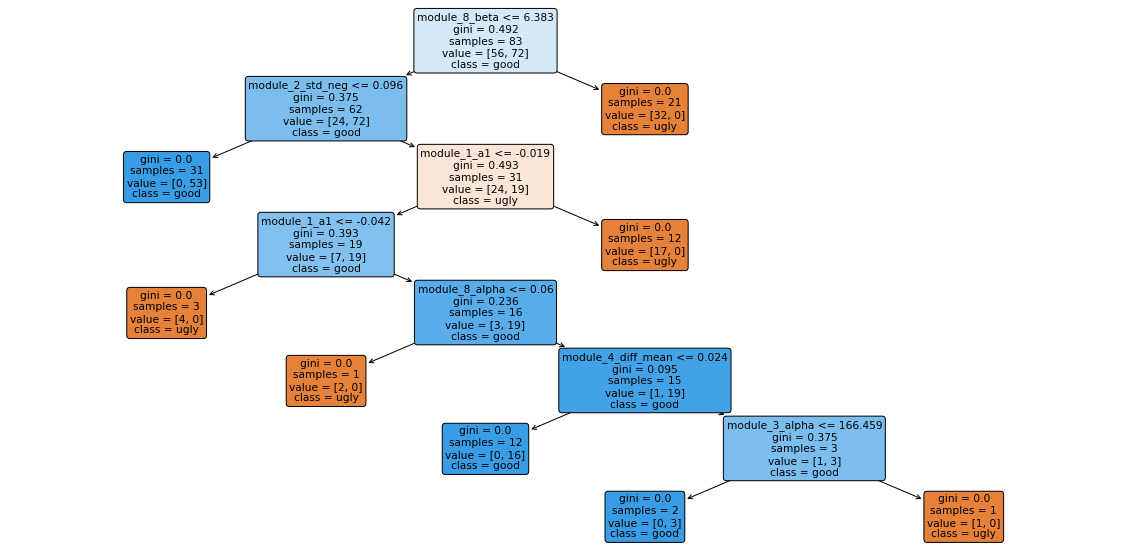

In [24]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[0], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

[Text(0.4666666666666667, 0.9285714285714286, 'module_2_std_pos <= 0.083\ngini = 0.5\nsamples = 88\nvalue = [62, 66]\nclass = good'),
 Text(0.26666666666666666, 0.7857142857142857, 'module_4_diff_std <= 0.065\ngini = 0.225\nsamples = 43\nvalue = [8, 54]\nclass = good'),
 Text(0.13333333333333333, 0.6428571428571429, 'module_3_alpha <= 166.442\ngini = 0.278\nsamples = 4\nvalue = [5, 1]\nclass = ugly'),
 Text(0.06666666666666667, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [5, 0]\nclass = ugly'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = good'),
 Text(0.4, 0.6428571428571429, 'total_sequences <= 3459170.0\ngini = 0.101\nsamples = 39\nvalue = [3, 53]\nclass = good'),
 Text(0.3333333333333333, 0.5, 'module_1_status <= 1.5\ngini = 0.036\nsamples = 38\nvalue = [1, 53]\nclass = good'),
 Text(0.26666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.4, 0.35714285714285715, 'gini = 0.0\nsamples = 37\nvalue = [0, 53]\nclass = g

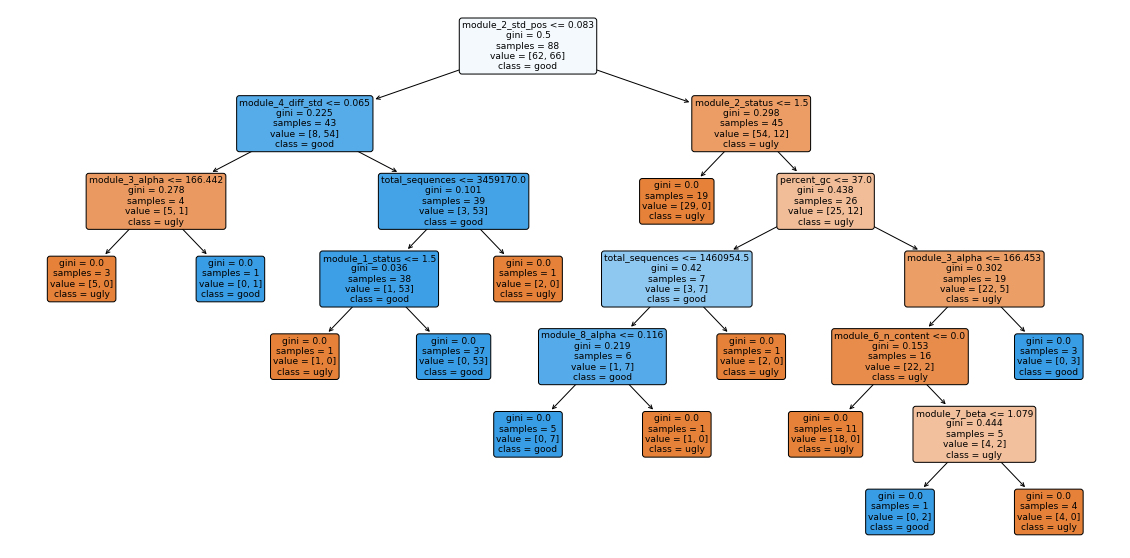

In [25]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[12], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Other Classification Algorithms

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [27]:
y_pred = clf_lg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.6785714285714286
Precision:  0.875
Recall:  0.6666666666666666
F1 Score:  0.7567567567567567


Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB().fit(X_train, y_train)

In [29]:
y_pred = clf_gnb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9107142857142857
Precision:  0.8936170212765957
Recall:  1.0
F1 Score:  0.9438202247191011


K Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.6071428571428571
Precision:  0.8125
Recall:  0.6190476190476191
F1 Score:  0.7027027027027026
